<a class="anchor" id="0.1"></a>
# Life Expectancy and GDP Portfolio Project

- [1.Exploratory Data Analysis](#1)
- [2. Univariate Analysis](#2)

- [3. Bivariate Analysis](#3)

- [4. Multivariate Analysis](#4)

The dataset provided has the following columns of data:
- `Country` : nation
- `Year` : the year for the observation
- `Life expectancy at birth (years)` : life expectancy value in years
- `GDP` : Gross Domestic Product in U.S. dollars

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Exploratory Data Analysis <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

In [28]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [29]:
df.shape

(96, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [31]:
df.duplicated().sum()

0

In [32]:
df.rename(columns = {"Life expectancy at birth (years)" : "Life Expectancy"}, inplace=True)

In [33]:
df.columns

Index(['Country', 'Year', 'Life Expectancy', 'GDP'], dtype='object')

In [34]:
df["GDP_billion"] = round(df["GDP"] / 1000000000)

In [35]:
df.drop(columns="GDP", inplace=True)

In [43]:
df.describe()

,Year,Life Expectancy,GDP_billion
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.489583
std,4.633971,10.672882,5197.576553
min,2000.000000,44.300000,4.000000
25%,2003.750000,74.475000,173.500000
50%,2007.500000,76.750000,1280.000000
75%,2011.250000,78.900000,4067.750000
max,2015.000000,81.000000,18100.000000


## 2. Univariate Analysis <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

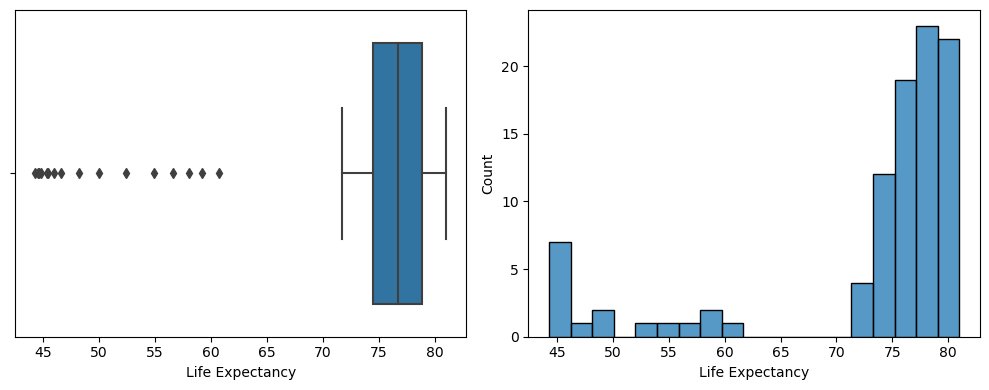

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df["Life Expectancy"])

plt.subplot(1,2,2)
sns.histplot(df["Life Expectancy"])
plt.tight_layout()

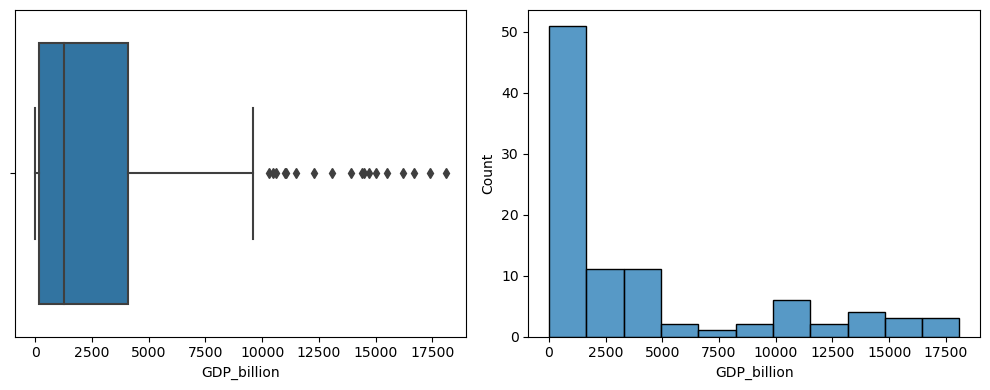

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df["GDP_billion"])

plt.subplot(1,2,2)
sns.histplot(df["GDP_billion"])
plt.tight_layout()

## 3. Bivariate Analysis <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

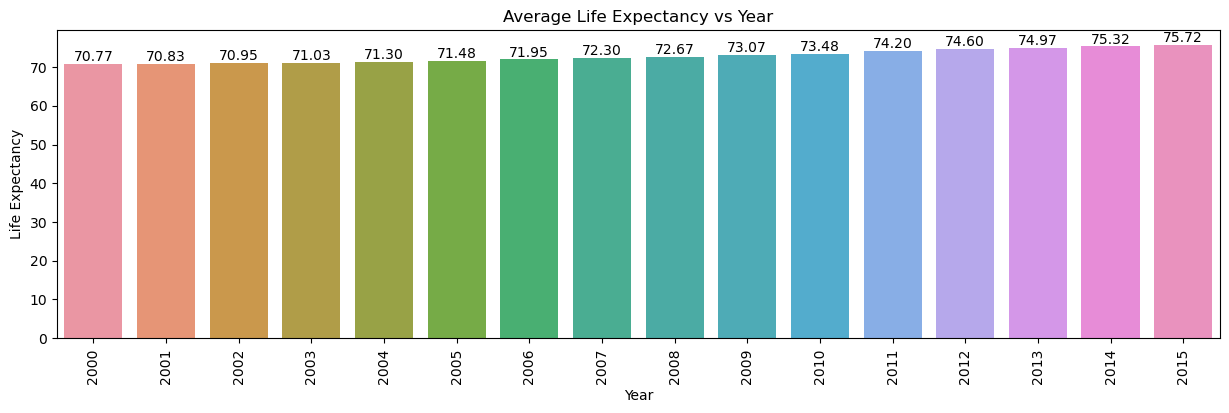

In [112]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data = df.groupby(["Year"])["Life Expectancy"].mean().reset_index(), x = "Year", y = "Life Expectancy")
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

plt.xticks(rotation = 90)
plt.title("Average Life Expectancy vs Year")
plt.show()

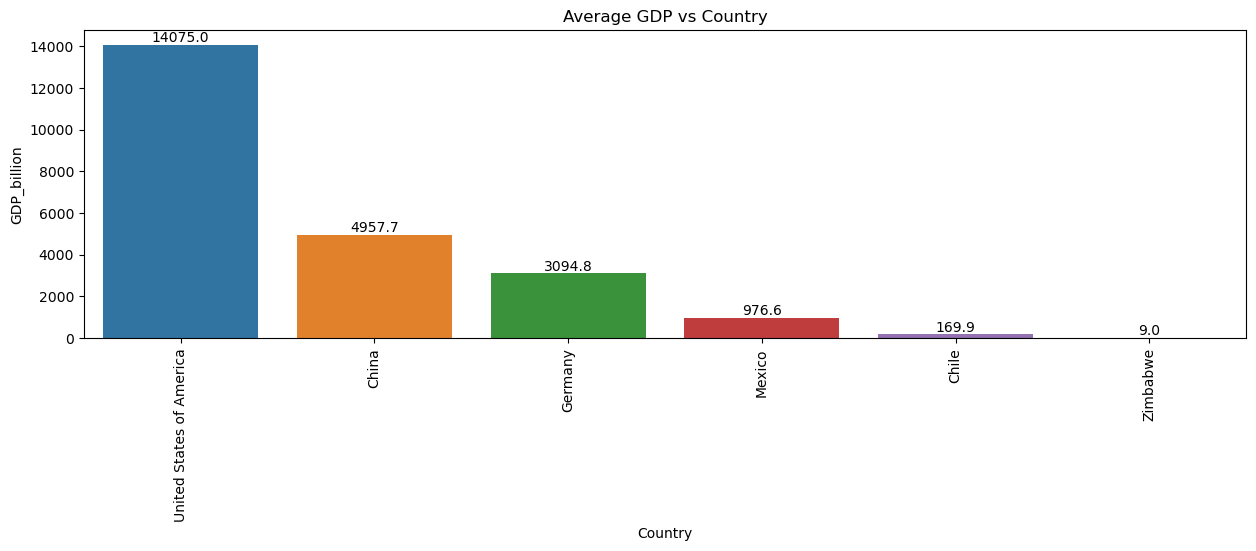

In [80]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data = df.groupby("Country")["GDP_billion"].mean().reset_index(), x = "Country", y = "GDP_billion",
                 order = ["United States of America", "China", "Germany", "Mexico", "Chile", "Zimbabwe"])
for i in ax.containers:
    ax.bar_label(i, fmt = "%.1f")

plt.xticks(rotation = 90)
plt.title("Average GDP vs Country")
plt.show()

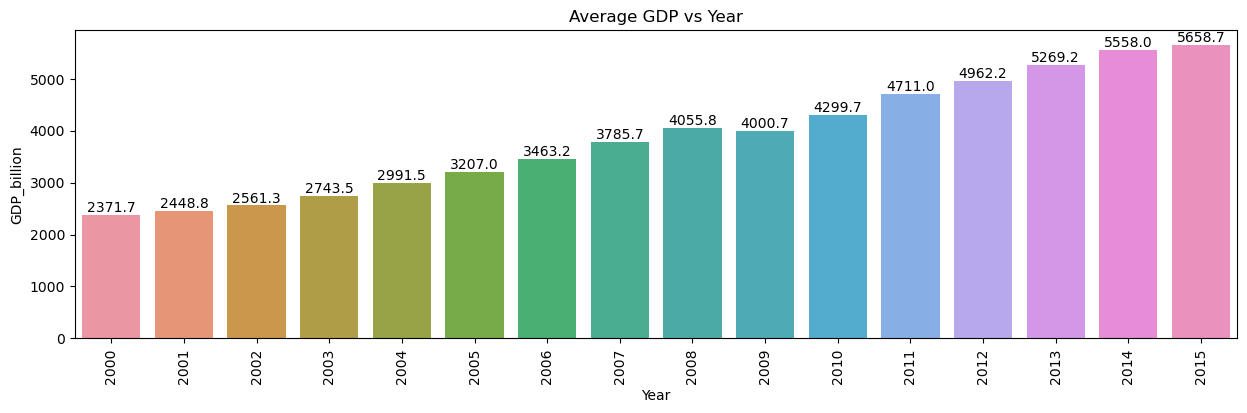

In [120]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data = df.groupby("Year")["GDP_billion"].mean().reset_index(), x = "Year", y = "GDP_billion")
for i in ax.containers:
    ax.bar_label(i, fmt = "%.1f")

plt.xticks(rotation = 90)
plt.title("Average GDP vs Year")
plt.show()

**What is the average life expectancy in these nations?**

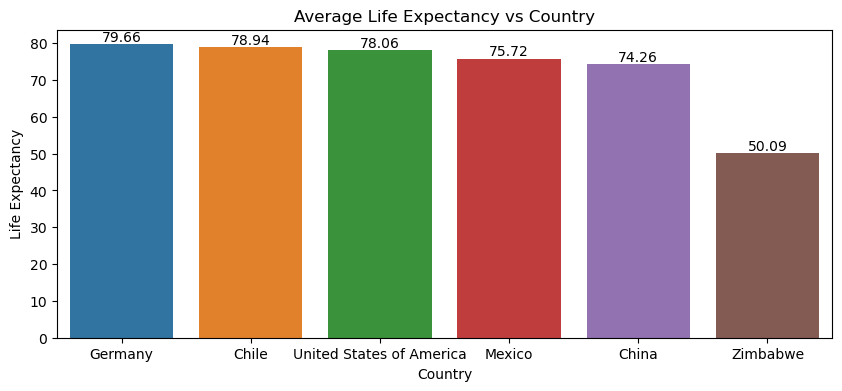

In [110]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = df.groupby("Country")["Life Expectancy"].mean().reset_index(), x = "Country", y = "Life Expectancy",
                 order = ["Germany", "Chile", "United States of America", "Mexico", "China", "Zimbabwe"])
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

plt.title("Average Life Expectancy vs Country")
plt.show()

**What is the distribution of that life expectancy?**

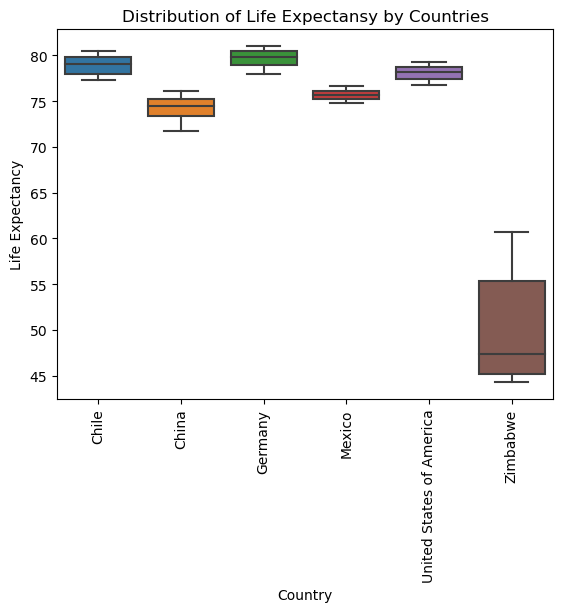

In [128]:
sns.boxplot(data = df, x ="Country", y = "Life Expectancy")
plt.xticks(rotation = 90)
plt.title("Distribution of Life Expectansy by Countries");

**Is there a correlation between GDP and life expectancy of a country?**

In [125]:
df["GDP_billion"].corr(df["Life Expectancy"])

0.3432102455425186

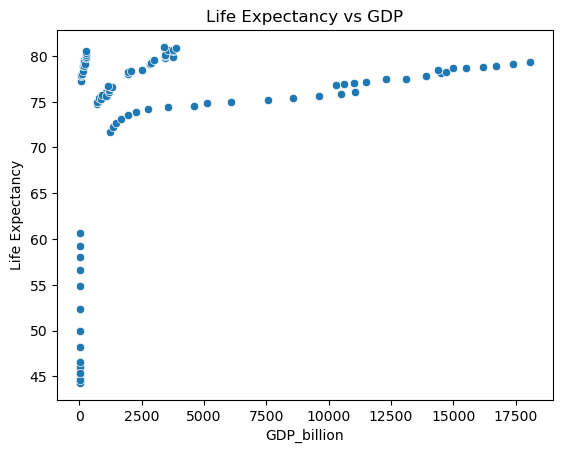

In [83]:
sns.scatterplot(data = df, y = "Life Expectancy", x = "GDP_billion")
plt.title("Life Expectancy vs GDP");

## 4. Multivariate Analysis <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

<AxesSubplot:xlabel='Life Expectancy', ylabel='GDP_billion'>

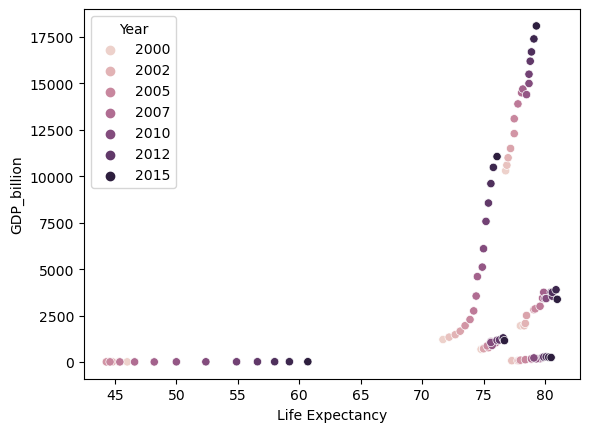

In [96]:
sns.scatterplot(data = df, x = "Life Expectancy", y = "GDP_billion", hue = "Year")

<AxesSubplot:>

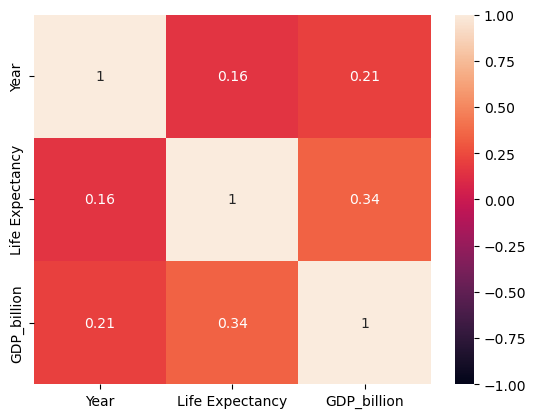

In [101]:
sns.heatmap(df.corr(), annot = True, vmin = -1)

**Has life expectancy increased over time in the six nations?**

In [114]:
df["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

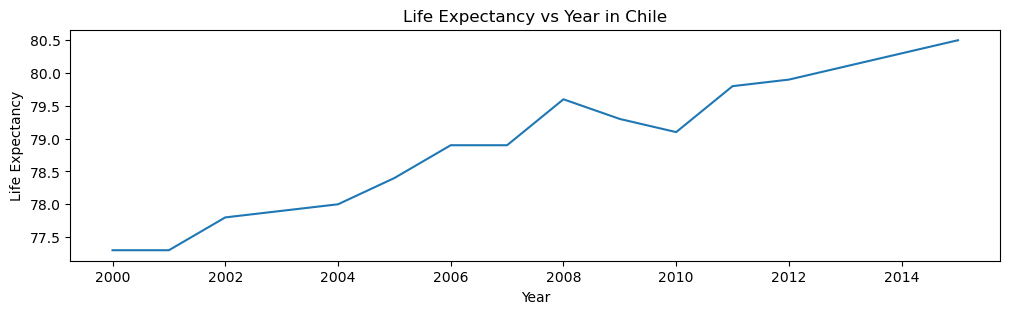

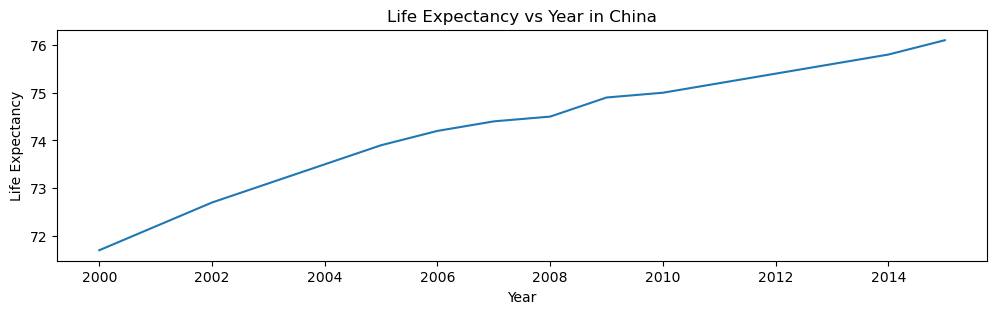

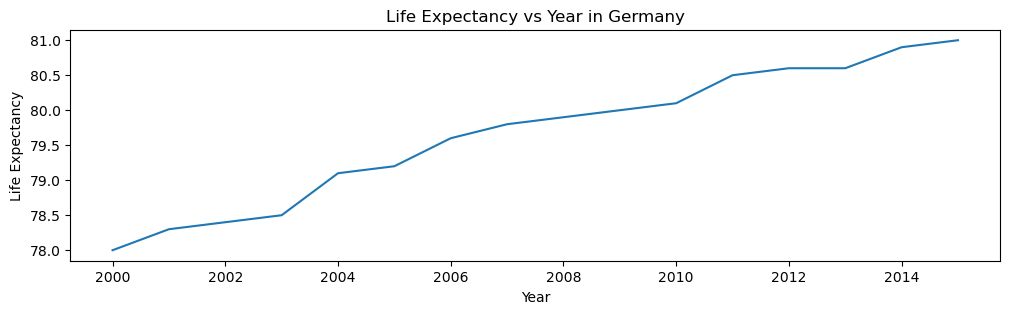

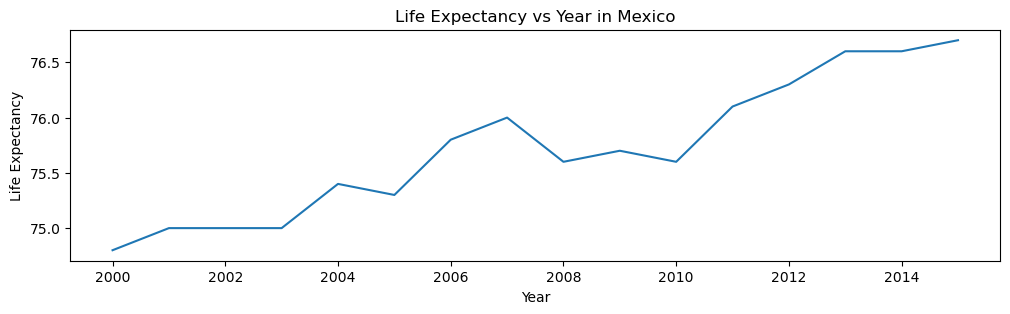

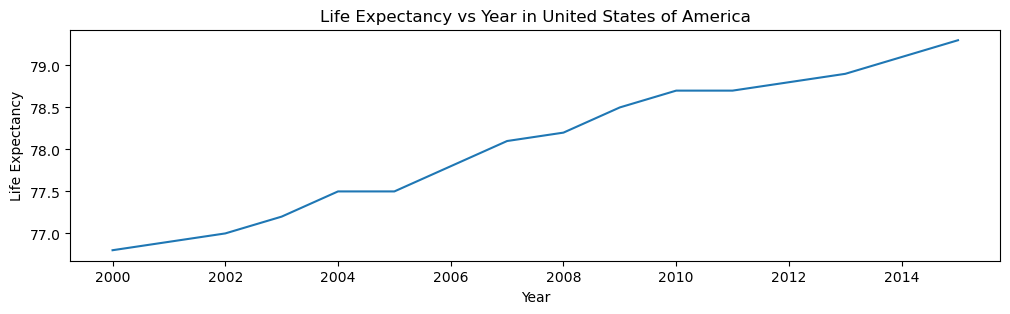

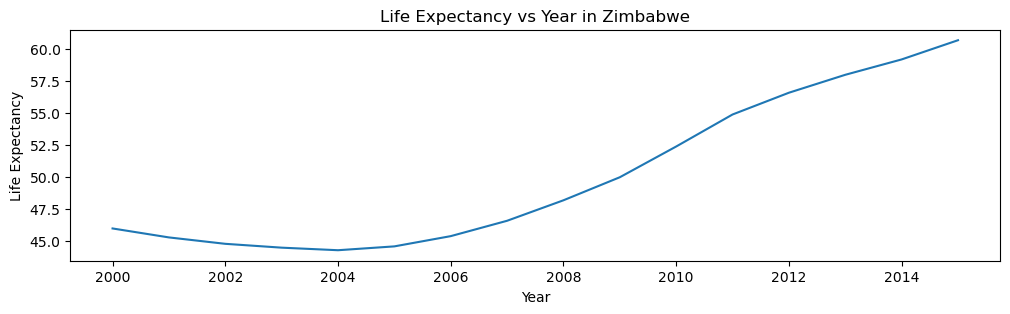

In [124]:
for country in df["Country"].unique():
    plt.figure(figsize=(12, 3))
    sns.lineplot(data = df[df["Country"] == country], x = "Year", y = "Life Expectancy")
    plt.title(f"Life Expectancy vs Year in {country}")
    plt.show()

**Has GDP increased over time in the six nations?**

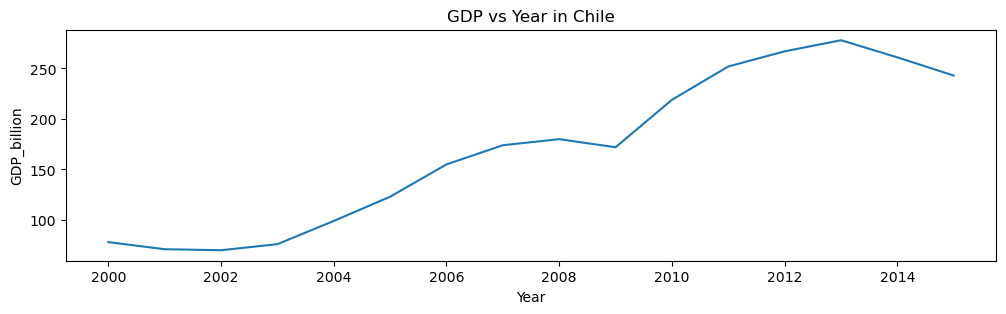

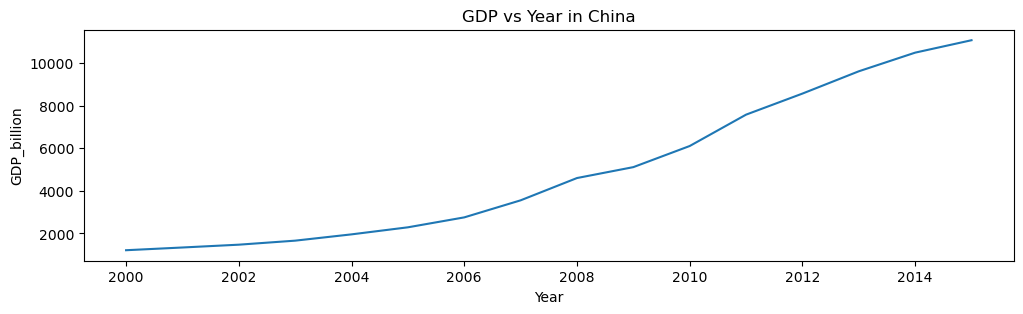

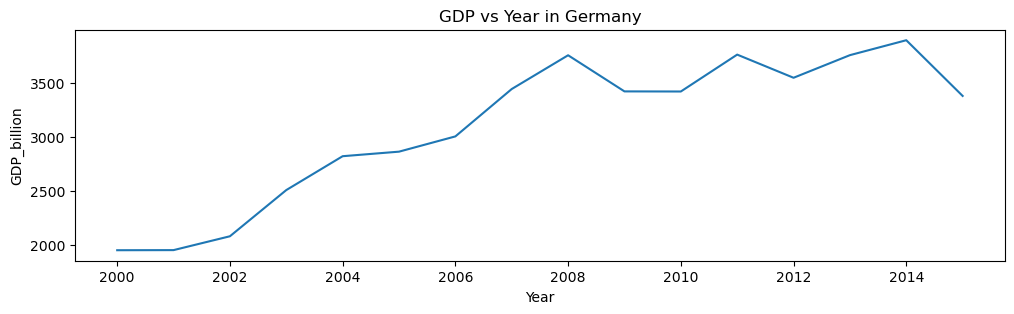

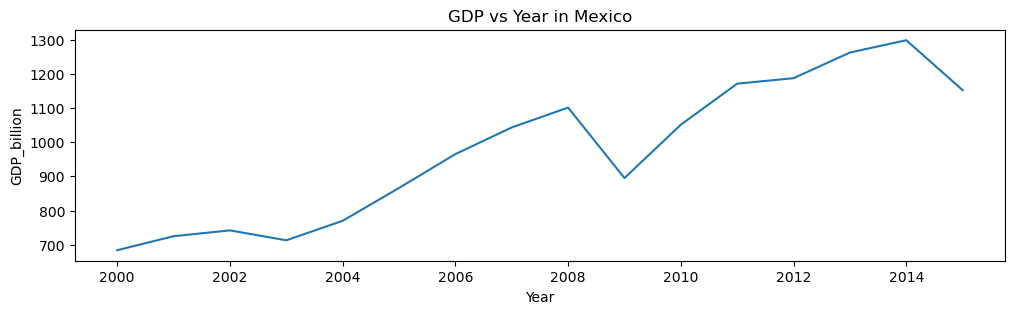

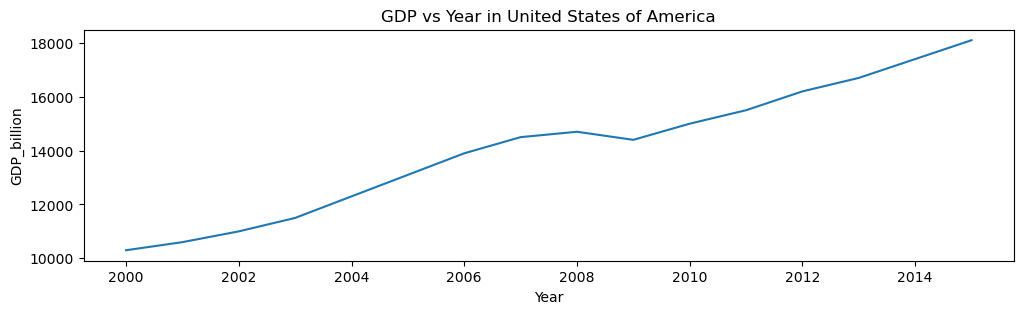

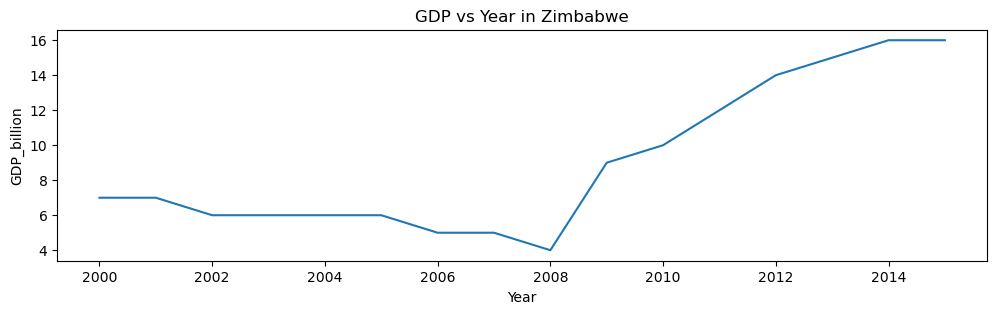

In [122]:
for country in df["Country"].unique():
    plt.figure(figsize=(12, 3))
    sns.lineplot(data = df[df["Country"] == country], x = "Year", y = "GDP_billion")
    plt.title(f"GDP vs Year in {country}")
    plt.show()